<a href="https://www.kaggle.com/code/iqmansingh/mohs-hardness-oof-preds-lgbm-catboost-xgb?scriptVersionId=150841510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display:fill;
           background-color:#89B9AD88;
           letter-spacing:0.5px;border-bottom: 2px solid black;">
<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/mohs_hardness/mohs-banner.jpg">
    
<h1 style="padding: 12px; color:black; font-weight:600;font-family: 'Garamond', 'Lucida Sans', sans-serif; text-align: center; font-size: 32px;text-transform: uppercase;">Regression with Mohs Hardness Dataset</h1>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Da1. Dataset Overviewrk
sns.set_palette("viridis")
# sns.color_palette("flare")
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, median_absolute_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import optuna
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from catboost import Pool, CatBoostRegressor, cv

<div style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
    📝 Table of Contents
    </h1>
</div>
<br>
<a href="#1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 1. Dataset Overview </a><br>
<a href="#2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 2. EDA </a><br>
<a href="#3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 3. Simple Data Preprocessing </a><br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 4. Training Models </a><br>
<a href="#4.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.1 Baseline RandomForest Model </a><br>
<a href="#4.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.2 Baseline CatBoost Model </a><br>
<a href="#4.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.3 Baseline LGBM Model </a><br>
<a href="#4.4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.4 Baseline XGB Model </a><br>
<a href="#4.5" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.5 Optuna LGBM Model </a><br>
<a href="#4.6" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.6 Optuna XGB Model </a><br>
<a href="#4.7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.7 Voting Regressor </a><br>
<a href="#4.7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 14px;padding-left: 25px;"> 4.8 OOF Predictions </a><br>
<a href="#6" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 5. Plotting Feature Importance </a><br>
<a href="#7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 6. Creating 'submission.csv' </a><br>
<a href="#8" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #183D3D;font-size: 18px;"> 7. Conclusion </a>

<div id="1" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32;">
    Dataset Overview
    </h1>
</div>

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv", index_col="id")
orig_data = pd.read_csv("/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1/Mineral_Dataset_Supplementary_Info.csv",index_col="Unnamed: 0")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv",index_col="id")

orig_data["Hardness"] = round(orig_data["Hardness"]*2)/2
train_data = pd.concat([train_data,orig_data])

sample = pd.read_csv("/kaggle/input/playground-series-s3e25/sample_submission.csv")
sample["Hardness"] = 0

for col in train_data.columns:
    train_data[col] = train_data[col].astype(np.float32)
for col in test_data.columns:
    test_data[col] = test_data[col].astype(np.float32)

In [3]:
train_data.head(10)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213348,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988132,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
5,131.0,24.529327,21.833334,4.666667,50.131500,11.948200,2.858333,1.758333,0.896667,0.466388,2.94712,6.0
6,50.0,3.253996,10.000000,4.800000,20.077019,11.023840,2.727000,1.767000,0.880000,0.499010,0.80631,2.0
7,30.0,2.701748,6.000000,4.000000,11.663548,12.415840,2.766000,1.495000,0.710000,0.618492,0.41631,4.0
8,120.0,14.632000,12.000000,4.800000,24.808517,11.331820,2.870000,1.718500,0.910000,0.492736,1.96268,6.0
9,97.0,13.477328,12.812500,5.000000,24.988132,11.037175,2.818750,1.601250,0.881250,0.493192,1.10889,5.8


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11029 entries, 0 to 630
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     11029 non-null  float32
 1   density_Total          11029 non-null  float32
 2   allelectrons_Average   11029 non-null  float32
 3   val_e_Average          11029 non-null  float32
 4   atomicweight_Average   11029 non-null  float32
 5   ionenergy_Average      11029 non-null  float32
 6   el_neg_chi_Average     11029 non-null  float32
 7   R_vdw_element_Average  11029 non-null  float32
 8   R_cov_element_Average  11029 non-null  float32
 9   zaratio_Average        11029 non-null  float32
 10  density_Average        11029 non-null  float32
 11  Hardness               11029 non-null  float32
dtypes: float32(12)
memory usage: 603.1 KB


In [5]:
train_data.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.00000,11029.000000
mean,138.478027,15.245563,16.907728,4.539603,37.210823,10.947921,2.608727,1.727907,0.940243,0.494563,2.12126,4.649074
std,300.368286,18.357166,10.453092,0.698567,25.961319,1.430073,0.339107,0.197129,0.181762,0.065491,1.93760,1.683276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.599905,2.530000,1.672500,0.864000,0.476196,0.81244,3.000000
50%,100.000000,11.073071,12.500000,4.700000,26.164726,11.221458,2.706000,1.732000,0.914286,0.489272,1.34593,5.500000
75%,138.000000,17.590000,21.833334,4.800000,48.719501,11.688350,2.805000,1.797812,0.980000,0.496606,2.73200,6.000000
max,15300.000000,643.093811,67.000000,6.000000,167.399994,15.245810,3.443000,2.250000,1.615840,0.825990,10.97000,10.000000


In [6]:
test_data.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000
mean,126.460129,14.794020,17.406185,4.546852,38.422791,10.921513,2.608119,1.737907,0.949638,0.491675,2.152066
std,207.564499,18.982447,10.996089,0.683158,27.344351,1.378980,0.322873,0.190584,0.179266,0.060829,1.958212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.584314,2.527500,1.678000,0.866667,0.476095,0.812440
50%,100.000000,10.650000,12.666667,4.750000,26.203827,11.202760,2.706000,1.736000,0.920000,0.488550,1.351550
75%,128.000000,16.601328,22.000000,4.800000,48.719501,11.645560,2.806667,1.820000,0.990000,0.496119,2.780220
max,10116.000000,643.093811,67.000000,6.000000,167.399994,15.245810,3.443000,2.250000,1.615333,0.825990,10.970000


<div id="2" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
   📊 Exploratory Data Analysis
    </h1>
</div>

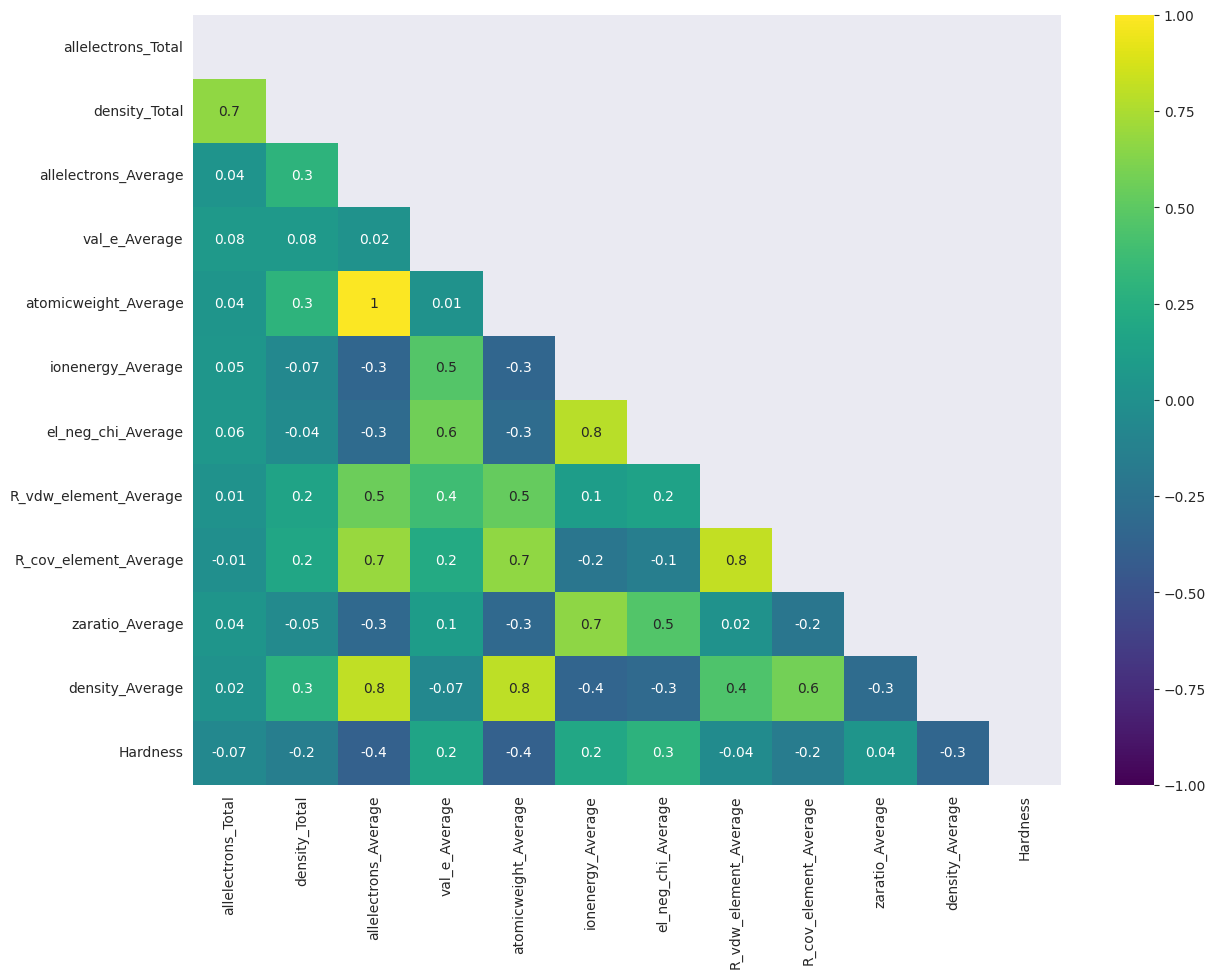

In [7]:
mask = np.triu(np.ones_like(train_data.corr()))
plt.figure(figsize=(14,10))
sns.heatmap(train_data.corr(), cmap="viridis", annot=True, mask=mask,vmin=-1,vmax=1,fmt=".1g");

In [8]:
fig,axes = plt.subplots(12,2,figsize=(15, 40),dpi=300)

for ind,col in enumerate(train_data.columns):
    plt.subplot(12,2,2*ind+1)
    sns.histplot(orig_data[col],bins=15,kde=True)
    plt.gca().set_title(col)
    
    plt.subplot(12,2,2*ind+2)
    sns.boxplot(orig_data[col],orient="h")
    plt.gca().set_title(col)

fig.tight_layout()
plt.show()

<div id="3" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
   🧪 Simple Data Preprocessing
    </h1>
</div>

In [9]:
# for i in train_data.columns: 
#     if i=="Hardness":
#         continue
#     Q1 = train_data[i].quantile(0.25)
#     Q3 = train_data[i].quantile(0.75)
#     IQR = Q3-Q1
#     upper_limit = Q3+1.5*IQR
#     lower_limit = Q1-1.5*IQR 
# #     print(upper_limit,lower_limit)
#     train_data[i].clip(lower = lower_limit,upper = upper_limit,inplace=True)   
#     test_data[i].clip(lower = lower_limit,upper = upper_limit,inplace=True)

In [10]:
# train_data.describe()

<div id="4" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
   🤖 Training Models
    </h1>
</div>

In [11]:
seed = np.random.seed(6)

X = train_data.drop(["Hardness"],axis=1)
y = train_data["Hardness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: left; color: #263A29; font-weight: normal; font-size: 28px;">Evaluation Metric (Median Abs Error):</h1>
</div>

\begin{align}
MedAE (y,\hat{y}) = median(| y_i - \hat {y}_i |,...,| y_n - \hat {y}_n |)
\end{align}


<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 30px;">
   3.1 Baseline RandomForest Model
    </h1>
</div>
<hr>

In [12]:
rfmodel = RandomForestRegressor(random_state=seed)
rfmodel.fit(X,y)
print("CV MedAE of Baseline RF is",-1*cross_val_score(rfmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Baseline RF is",-1*cross_val_score(rfmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Baseline RF is 0.6346249958872794
CV MAE of Baseline RF is 0.8871942559807058


<div id="4.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 30px;">
   3.2 Baseline CatBoost Model
    </h1>
</div>
<hr>

In [13]:
catmodel = CatBoostRegressor(random_state=seed,verbose=0)
catmodel.fit(X,y)
print("CV MedAE of Baseline Cat is",-1*cross_val_score(catmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Baseline Cat is",-1*cross_val_score(catmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Baseline Cat is 0.6379076799274008
CV MAE of Baseline Cat is 0.8854977647433575


<div id="4.3" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 30px;">
   3.3 Baseline LGBM Model
    </h1>
</div>
<hr>

In [14]:
lgbmmodel = LGBMRegressor(random_state=seed)
lgbmmodel.fit(X,y)
print("CV MedAE of Baseline LGBM is",-1*cross_val_score(lgbmmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Baseline LGBM is",-1*cross_val_score(lgbmmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Baseline LGBM is 0.6289447801376726
CV MAE of Baseline LGBM is 0.8788276586062088


<div id="4.4" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 30px;">
   3.4 Baseline XGB Model
    </h1>
</div>
<hr>

In [15]:
xgbmodel = XGBRegressor(random_state=seed)
xgbmodel.fit(X,y)
print("CV MedAE of Baseline XGB is",-1*cross_val_score(xgbmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Baseline XGB is",-1*cross_val_score(xgbmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Baseline XGB is 0.6502735316753387
CV MAE of Baseline XGB is 0.911487028002739


<div id="4.5" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 30px;">
   3.5 Optuna LGBM Model
    </h1>
</div>
<hr>

In [16]:
# def objective(trial):
#     params = {
#         'n_estimators' : trial.suggest_int('n_estimators',500,1000),
#         "max_depth":trial.suggest_int('max_depth',3,50),
#         "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.25, log=True),
#         "min_child_weight" : trial.suggest_float('min_child_weight', 0.5,4),
#         "min_child_samples" : trial.suggest_int('min_child_samples',1,250),
#         "subsample" : trial.suggest_float('subsample', 0.2, 1),
#         "subsample_freq" : trial.suggest_int('subsample_freq',0,5),
#         "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#         'num_leaves' : trial.suggest_int('num_leaves', 2, 128),
#     }
#     lgbmmodel_optuna = LGBMRegressor(**params,random_state=seed,device="gpu")
#     cv = -1*cross_val_score(lgbmmodel_optuna, X, y, cv = 4,scoring='neg_mean_absolute_error').mean()
#     return cv

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100,timeout=2000)

In [17]:
lgbm_params = {'n_estimators': 785, 'max_depth': 36, 'learning_rate': 0.01417471417676199,
               'min_child_weight': 1.1070027262610547, 'min_child_samples': 15,
               'subsample': 0.6061322281791591, 'subsample_freq': 3,
               'colsample_bytree': 0.4174456813911724, 'num_leaves': 55}

lgbmopt = LGBMRegressor(**lgbm_params,random_state=seed)
lgbmopt.fit(X,y)
print("CV MedAE of Optuna LGBM is",-1*cross_val_score(lgbmopt,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Optuna LGBM is",-1*cross_val_score(lgbmopt,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Optuna LGBM is 0.6207601943657005
CV MAE of Optuna LGBM is 0.8682468320344652


<div id="4.6" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 30px;">
   3.6 Optuna XGB Model
    </h1>
</div>
<hr>

In [18]:
# def objective(trial):
#     params = {
#         'n_estimators' : trial.suggest_int('n_estimators',500,1000),
#         'max_depth':  trial.suggest_int('max_depth',3,50),
#         'min_child_weight': trial.suggest_float('min_child_weight', 2,50),
#         "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.2,log=True),
#         'subsample': trial.suggest_float('subsample', 0.2, 1),
#         'gamma': trial.suggest_float("gamma", 1e-4, 1.0),
#         "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#         "colsample_bylevel" : trial.suggest_float('colsample_bylevel',0.2,1),
#         "colsample_bynode" : trial.suggest_float('colsample_bynode',0.2,1),
#     }
#     xgbmodel_optuna = XGBRegressor(**params,random_state=seed,tree_method = "gpu_hist",eval_metric= "MAE")
#     cv = -1*cross_val_score(xgbmodel_optuna, X, y, cv = 4,scoring='neg_mean_absolute_error').mean()
#     return cv

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100,timeout=2000)

In [19]:
xgb_params = {'n_estimators': 887, 'max_depth': 9, 'min_child_weight': 10.170221895950583,
              'learning_rate': 0.008383026974789366, 'subsample': 0.6705032929674755,
              'gamma': 0.6206804342071246, 'colsample_bytree': 0.6811067581297359,
              'colsample_bylevel': 0.8931207102930049, 'colsample_bynode': 0.9326927674256934}

xgbopt = XGBRegressor(**xgb_params,random_state=seed)
xgbopt.fit(X,y)
print("CV MedAE of Optuna XGB is",-1*cross_val_score(xgbopt,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Optuna XGB is",-1*cross_val_score(xgbopt,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Optuna XGB is 0.6238673329353333
CV MAE of Optuna XGB is 0.8687347769737244


<div id="4.7" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 30px;">
   3.7 Voting Regressor
    </h1>
</div>
<hr>

In [20]:
vrmodel = VotingRegressor([("rf",rfmodel),("cat",catmodel),("lgbm",lgbmmodel),("xgb",xgbopt)])
vrmodel.fit(X,y)
print("CV MedAE of Voting Regressor is",-1*cross_val_score(vrmodel,X,y,cv=4,scoring="neg_median_absolute_error").mean())
print("CV MAE of Voting Regressor is",-1*cross_val_score(vrmodel,X,y,cv=4,scoring="neg_mean_absolute_error").mean())

CV MedAE of Voting Regressor is 0.6224390776534034
CV MAE of Voting Regressor is 0.8705964492929666


<div id="4.8" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 30px;">
   3.8 OOF Predictions XGB + LGBM + Cat
    </h1>
</div>
<hr>

In [21]:
lgbm_params = {'n_estimators': 5000, 'max_depth': 34, 'learning_rate': 0.014759254243668252,
               'min_child_weight': 1.004223152223077, 'min_child_samples': 13,
               'subsample': 0.7635953290711944, 'subsample_freq': 4,
               'colsample_bytree': 0.9374069634322703, 'num_leaves': 46}

xgb_params = {'n_estimators': 5000, 'max_depth': 35, 'min_child_weight': 10.170221895950583,
              'learning_rate': 0.008383026974789366, 'subsample': 0.6705032929674755,
              'gamma': 0.6206804342071246, 'colsample_bytree': 0.6811067581297359,
              'colsample_bylevel': 0.8931207102930049, 'colsample_bynode': 0.9326927674256934}

In [22]:
SPLITS = 4
REPEATS = 1
lgbm_MedAE_score = []
cat_MedAE_score = []
xgb_MedAE_score = []
denom = 0

for i,(tr,val) in enumerate(RepeatedKFold(n_splits=SPLITS, n_repeats=REPEATS,random_state=seed).split(X,y)):
    
    print("-"*30,f"FOLD {i+1}/{SPLITS*REPEATS}","-"*30)
    X_train, X_test, y_train, y_test = X.iloc[tr,:],X.iloc[val,:],y.iloc[tr],y.iloc[val]
    
    print("->","LGBM:")
    lgbmmodel = LGBMRegressor(**lgbm_params,random_state=seed,device="gpu")
    lgbmmodel.fit(X_train,y_train, eval_set=[(X_test,y_test)], eval_names=["valid"],eval_metric=['mae'], early_stopping_rounds=1000,verbose = 500)
    MedAE = median_absolute_error(y_test, lgbmmodel.predict(X_test))
    MAE = mean_absolute_error(y_test, lgbmmodel.predict(X_test))
    print(f"\nFold {i+1} MedAE of LGBM =", MedAE)
    print(f"Fold {i+1} MAE of LGBM =", MAE,"\n")
    lgbm_MedAE_score.append(MedAE)
    if MAE<0.865:
        sample["Hardness"] += lgbmmodel.predict(test_data)
        denom+=1
        
    print("->","CAT:")
    train_dataset = Pool(data=X.iloc[tr,:],label=y.iloc[tr])
    eval_dataset = Pool(data=X.iloc[val,:],label=y.iloc[val])
    
    catmodel = CatBoostRegressor(iterations=2500,verbose=500, od_type="Iter",eval_metric="MAE", random_seed=seed,early_stopping_rounds=1000)
    catmodel.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)
    MedAE = median_absolute_error(y.iloc[val], catmodel.predict(X.iloc[val,:]))
    MAE = mean_absolute_error(y_test, catmodel.predict(X_test))
    print(f"\nFold {i+1} MedAE of CAT =", MedAE)
    print(f"Fold {i+1} MAE of CAT =", MAE,"\n")
    cat_MedAE_score.append(MedAE)
    if MAE<0.865:
        sample["Hardness"] += catmodel.predict(test_data)
        denom+=1
    
    print("->","XGB:")
    xgbmodel = XGBRegressor(**xgb_params,random_state=seed, tree_method= 'gpu_hist',eval_metric="mae",early_stopping_rounds = 1000)
    xgbmodel.fit(X_train,y_train, eval_set=[(X_test,y_test)],verbose = 500,callbacks=[EarlyStopping(rounds = 1000,save_best=True)])
    MedAE = median_absolute_error(y_test, xgbmodel.predict(X_test))
    MAE = mean_absolute_error(y_test, xgbmodel.predict(X_test))
    print(f"\nFold {i+1} MedAE of XGB =", MedAE)
    print(f"Fold {i+1} MAE of XGB =", MAE,"\n")
    xgb_MedAE_score.append(MedAE)
    if MAE<0.865:
        sample["Hardness"] += xgbmodel.predict(test_data)
        denom+=1
    
print("\n\n","-"*50,sep="")
print("CV score of LGBM is ",np.array(lgbm_MedAE_score).mean())
print("CV score of CAT is ",np.array(cat_MedAE_score).mean())
print("CV score of XGB is ",np.array(xgb_MedAE_score).mean())

------------------------------ FOLD 1/4 ------------------------------
-> LGBM:
[500]	valid's l1: 0.857021	valid's l2: 1.36862
[1000]	valid's l1: 0.850553	valid's l2: 1.37061
[1500]	valid's l1: 0.852628	valid's l2: 1.38013

Fold 1 MedAE of LGBM = 0.6123561391400669
Fold 1 MAE of LGBM = 0.8546265818441855 

-> CAT:
Learning rate set to 0.04057
0:	learn: 1.4733566	test: 1.4582900	best: 1.4582900 (0)	total: 3.19ms	remaining: 7.98s
500:	learn: 0.8071598	test: 0.8887597	best: 0.8887597 (500)	total: 1.47s	remaining: 5.88s
1000:	learn: 0.7226788	test: 0.8745798	best: 0.8744868 (990)	total: 2.96s	remaining: 4.43s
1500:	learn: 0.6592824	test: 0.8685665	best: 0.8684648 (1487)	total: 4.47s	remaining: 2.98s
2000:	learn: 0.6073457	test: 0.8667517	best: 0.8663606 (1933)	total: 5.96s	remaining: 1.49s
2499:	learn: 0.5632669	test: 0.8649475	best: 0.8647383 (2459)	total: 7.48s	remaining: 0us

bestTest = 0.8647383145
bestIteration = 2459

Shrink model to first 2460 iterations.

Fold 1 MedAE of CAT = 0.62

In [23]:
print(f"Preds selected from {denom} models")

Preds selected from 6 models


<div id="6" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
   📉 Plotting Feature Importance
    </h1>
</div>

In [24]:
history = pd.DataFrame()
def plotImportance(modelName,model):
    history["cols"] = X_test.columns
    history["imp"] = model.feature_importances_
    history.sort_values("imp",inplace=True,ascending=False)
    history.reset_index(drop=True)
    plt.figure(figsize=(15,5))
    sns.barplot(x=history["imp"],y=history["cols"],palette="rocket");
    plt.title("Feature Imporance of "+modelName)

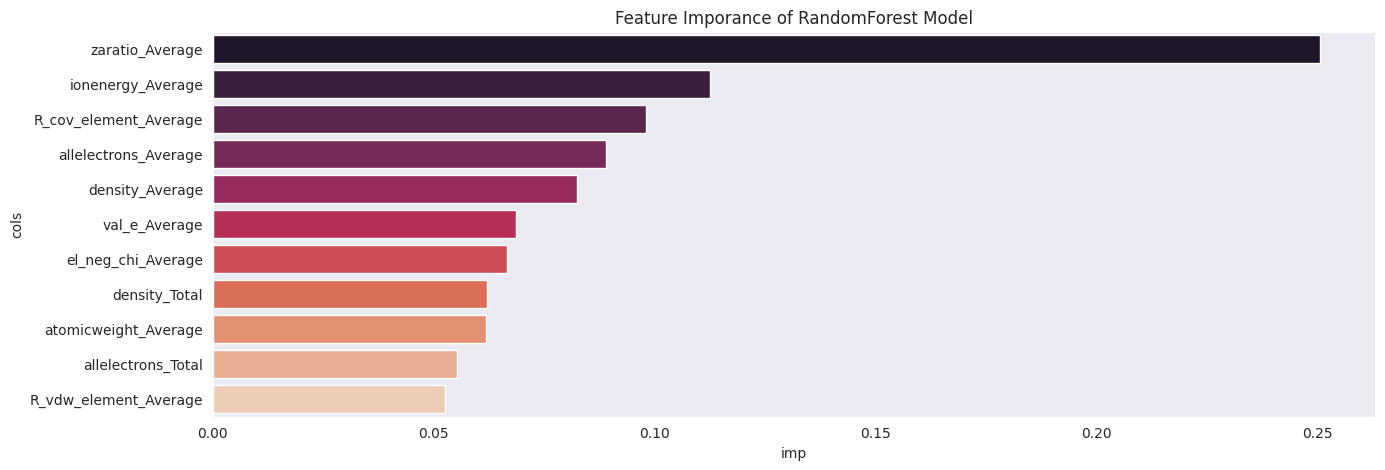

In [25]:
plotImportance("RandomForest Model",rfmodel)

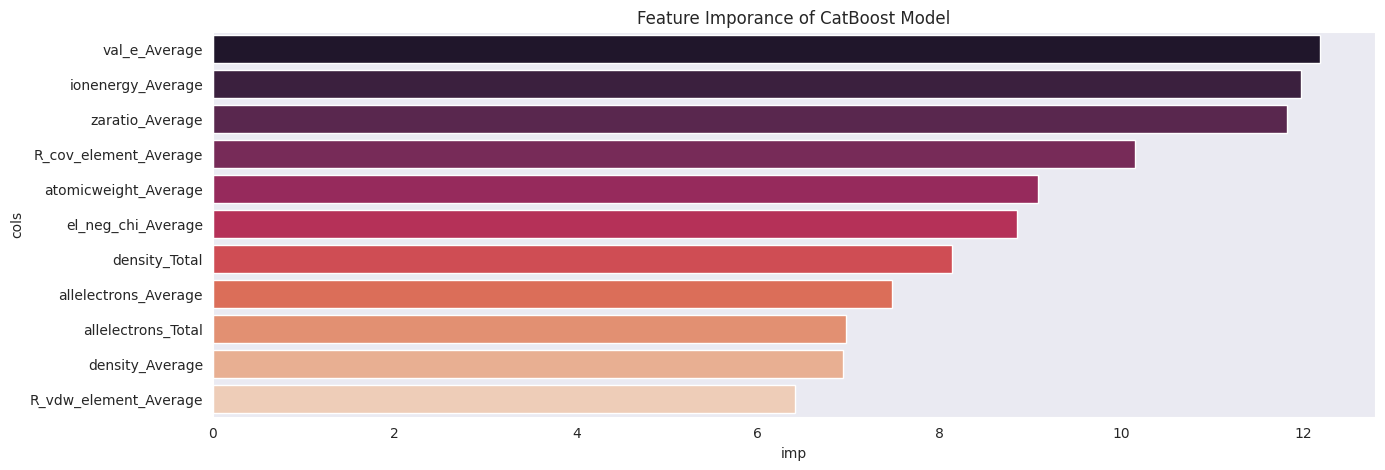

In [26]:
plotImportance("CatBoost Model",catmodel)

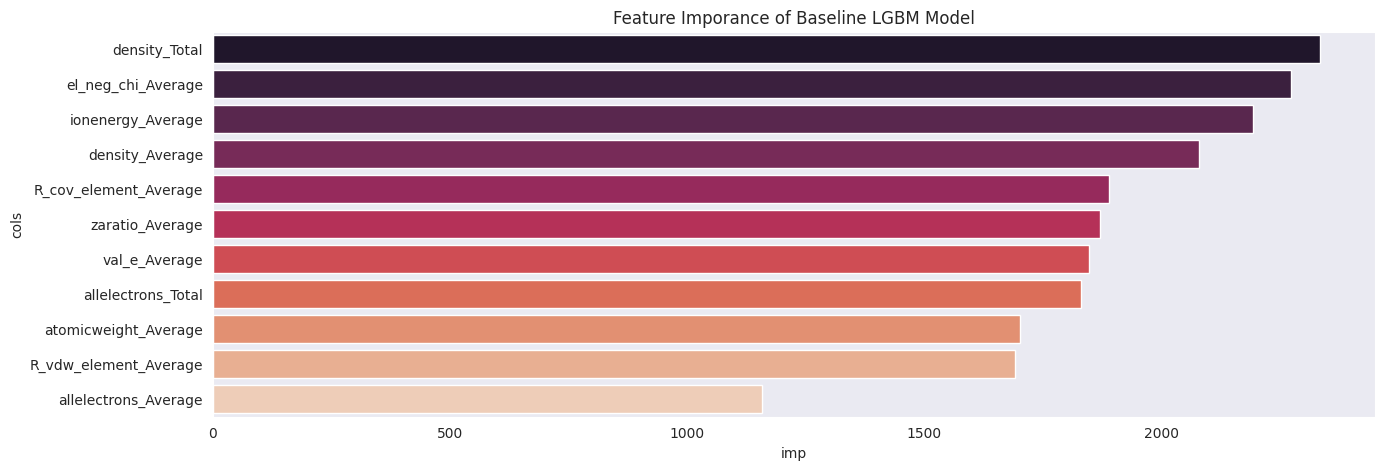

In [27]:
plotImportance("Baseline LGBM Model",lgbmmodel)

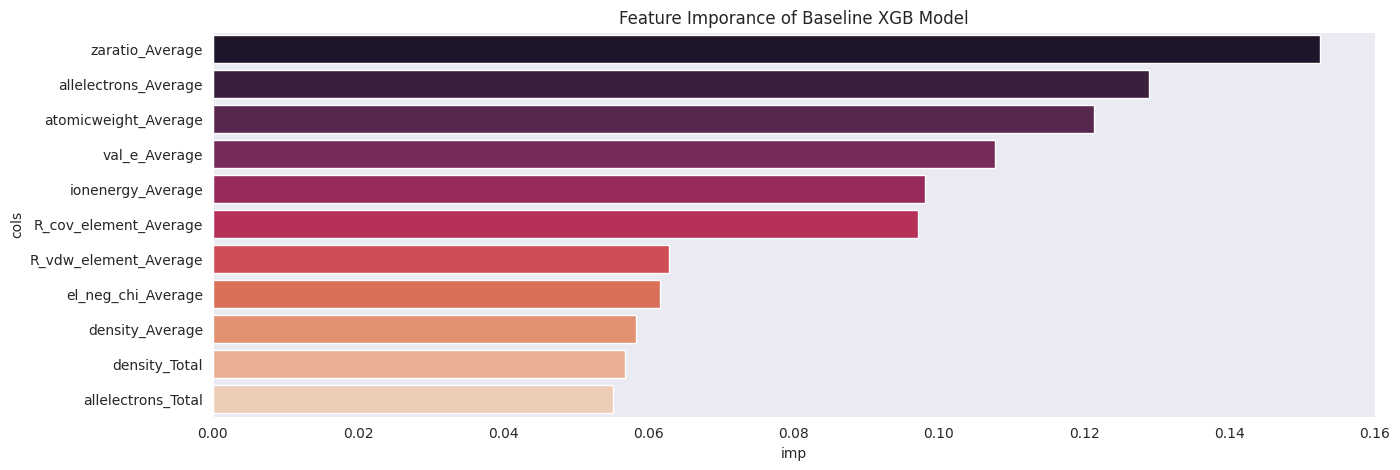

In [28]:
plotImportance("Baseline XGB Model",xgbmodel)

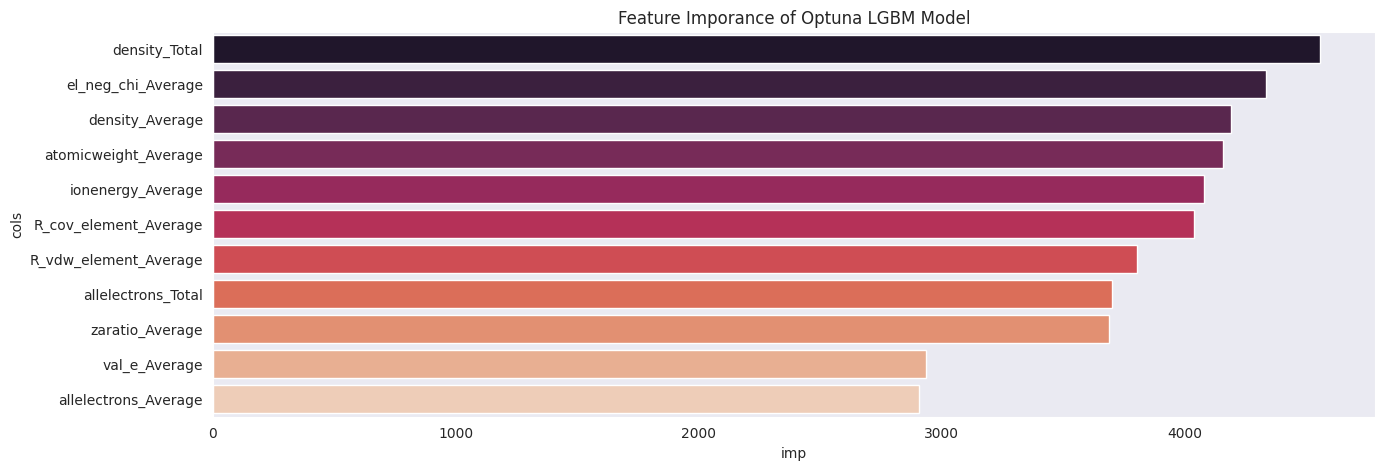

In [29]:
plotImportance("Optuna LGBM Model",lgbmopt)

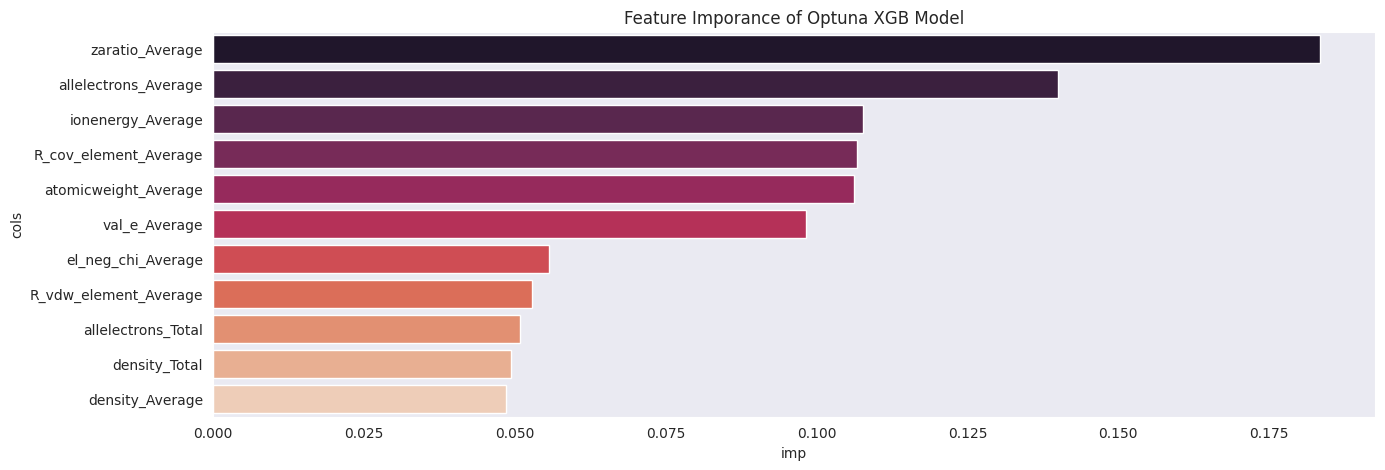

In [30]:
plotImportance("Optuna XGB Model",xgbopt)

<div id="7" style="background-color: #89B9AD88; padding: 12px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 32px;">
   🏁 Creating 'submission.csv'
    </h1>
</div>

In [31]:
# rf_preds = rfmodel.predict(test_data)
# cat_preds = catmodel.predict(test_data)
# lgbm_preds = lgbmmodel.predict(test_data)
# preds = (rf_preds + cat_preds + lgbm_preds)/3
# preds = vrmodel.predict(test_data)
# sample["Hardness"] = preds
# return round(number * 2) / 2

# processed_preds = []
# for i in preds:
#     float_part = i%1
#     int_part = int(i)
#     if float_part>0 and float_part<=0.5:
#         processed_preds.append(int_part+0.25)
#     else:
#         processed_preds.append(int_part+0.75)

# sample["Hardness"] = sample["Hardness"]/(3*SPLITS*REPEATS)
# sample["Hardness"] = round(sample["Hardness"]*2)/2

# public_work = pd.read_csv("/kaggle/input/pss3e25-autogluon/median_absolute_error.csv")
# sample["Hardness"] = (sample["Hardness"]+public_work["Hardness"])/2

In [32]:
sample["Hardness"] = sample["Hardness"]/denom
sample.to_csv("submission.csv",index=False,header=True)

<div id = "8" style="background-color: #89B9AD88; padding: 10px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 22px;">
    Conclusion 👋
    </h1>
    <h3 style="font-family: 'Garamond', 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: center; color: #505050; line-height: 1.2; font-size: 18px;">
    If you found the notebook helpful, please Upvote the Notebook😊<br>
    If you have any suggestion, feel free to Comment & Tag me<br>
    </h3>
</div>

